In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

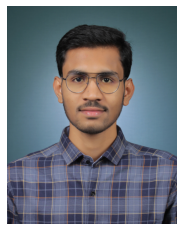

In [3]:
img = plt.imread("/content/sample_data/IMG_8026.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
type(img)

numpy.ndarray

In [6]:
print(img.shape)
print(img.size)

(531, 413, 3)
657909


In [7]:
w,h,d = img.shape
image_array = img.reshape(w*h, d)
print(image_array.shape)

#normalize in the range of (0,1)

image_array=image_array/255

(219303, 3)


In [8]:
from sklearn.utils import shuffle
# fitting model on a small sub sample of the complete image
image_array_sample =shuffle(image_array, random_state=1)[:1000]
image_array_sample.size

3000

In [9]:
kmeans =KMeans(n_clusters=6, random_state=1)
kmeans.fit(image_array_sample)

KMeans(n_clusters=6, random_state=1)

In [10]:
labels=kmeans.predict(image_array)
labels

array([5, 5, 5, ..., 0, 5, 5], dtype=int32)

In [11]:
print(kmeans.cluster_centers_)
c=kmeans.cluster_centers_

[[0.34036633 0.4184572  0.48728426]
 [0.13101353 0.12245236 0.13322287]
 [0.46579295 0.55003556 0.63580209]
 [0.55529412 0.40952381 0.33686275]
 [0.74428668 0.56096462 0.4355195 ]
 [0.24097639 0.2955102  0.34373749]]


In [12]:
# recreate original image according to labes and each pixels

def recreate_image(c,labels,w,h,d):
  image=np.zeros((w,h,d))
  label_idx =0

#now label each pixels according to the limited labels


  for i in range(w):
    for j in range(h):
      image[i][j]=c[labels[label_idx]]
      label_idx +=1

  return(image)

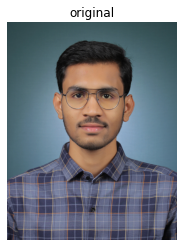

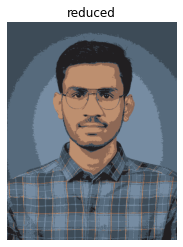

In [13]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()

In [15]:
print(img.size)

657909
